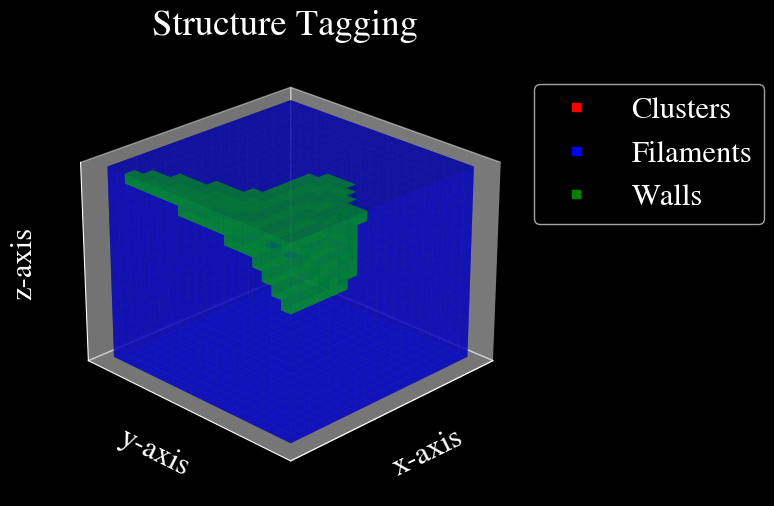

Plot Computed in 10.5 seconds


In [37]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import yaml
import io
import time


plt.style.use('dark_mode')

start = time.time()
#-----------------------------------------
#            Read YAML file
#-----------------------------------------

with open("../config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)

# hdulist = pyf.open('/Users/jamessunseri/Desktop/package_testing/sarabande/data/dens_t800.fits.gz')
# data = hdulist[0].data.astype(np.float64) # hopefully 64 is enough?

# data -= np.mean(data)

data_clus = np.load(config["output_directory"] + config["run_name"] + "_cluster_bool_filter.npy")
data_fil = np.load(config["output_directory"] + config["run_name"] + "_filament_bool_filter.npy")
data_wall = np.load(config["output_directory"] + config["run_name"] + "_wall_bool_filter.npy")

#######################################
#       Plotting Density Cube
#######################################

n = 20
axes = [n, n, n]
  
# Create Data
data_clus = data_clus[:n,:n,:n]
data_fil = data_fil[:n,:n,:n]
data_wall = data_wall[:n,:n,:n]
  

# Control colour
# cmap = plt.cm.hot #choose cmap
colors_clus = np.empty(axes + [4], dtype=np.float32)
colors_clus[:] = (1.0, 0.0, 0.0, 1.0)

colors_fil = np.empty(axes + [4], dtype=np.float32)
colors_fil[:] = (0.0, 0.0, 1.0, 1.0)

colors_wall = np.empty(axes + [4], dtype=np.float32)
colors_wall[:] = (0.0, 1.0, 0.0, 1.0)

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Hide grid lines
ax.grid(False)

#----------------
# Hide axes ticks
#----------------
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title("Structure Tagging")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.zaxis.set_rotate_label(False)
ax.set_zlabel("z-axis", rotation=90)
color_tuple = (1.0, 1.0, 1.0, 0.0)
ax.azim, ax.elev = (180 + 45,25)

#----------------
# Plot Voxels
#----------------
# Voxels is used to customizations of the
# sizes, positions and colors.
vox1 = ax.voxels(data_clus, alpha=1.0, facecolors=colors_clus)
vox2 = ax.voxels(data_fil, alpha=0.6, facecolors=colors_fil)
vox3 = ax.voxels(data_wall, alpha=0.4, facecolors=colors_wall)

ax.plot([],[],"rs", label="Clusters")
ax.plot([],[], "bs", label="Filaments")
ax.plot([],[], "gs", label="Walls")
ax.legend(loc=(1.05,0.6))

plt.savefig("voxels_darkmode.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

final = time.time()
print("Plot Computed in {0:0.4} seconds".format(final - start))

In [6]:
np.shape(data)

(20, 20, 20)

In [14]:
# Control colour
cmap = plt.cm.hot #choose cmap
colors = np.empty(axes + [4], dtype=np.float32)
colors[:] = cmap(data[:,:,:])  # red
co
cmap(1)

(0.05189484405443485, 0.0, 0.0, 1.0)